In [131]:
import ssgetpy
from scipy.sparse import lil_matrix

In [132]:
import numpy as np
class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.parent = np.arange(num_vertices)
        self.rank = np.zeros(num_vertices)

    def find(self, i):
        if self.parent[i] != i:
            self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, x, y):
        x_root = self.find(x)
        y_root = self.find(y)

        if self.rank[x_root] < self.rank[y_root]:
            self.parent[x_root] = y_root
        elif self.rank[x_root] > self.rank[y_root]:
            self.parent[y_root] = x_root
        else:
            self.parent[y_root] = x_root
            self.rank[x_root] += 1

    def kruskal_mst(self, edges):
        mst = []

        sorted_edges = sorted(edges, key=lambda x: x[2])

        for edge in sorted_edges:
            u, v, weight = edge
            u_root = self.find(u)
            v_root = self.find(v)

            if u_root != v_root:
                mst.append(edge)
                self.union(u_root, v_root)

        return mst

In [133]:
result = ssgetpy.search(kind = "Undirected Weighted Graph", limit = 10)
result

442,Gaertner,nopoly,10774,10774,70842,real,No,No,1.0,1.0,undirected weighted graph,
1493,Pajek,GD97_b,47,47,264,real,No,No,1.0,1.0,undirected weighted graph,
1500,Pajek,geom,7343,7343,23796,real,No,No,1.0,1.0,undirected weighted graph,
1506,Pajek,Journals,124,124,12068,real,No,Yes,1.0,1.0,undirected weighted graph,
1517,Pajek,Reuters911,13332,13332,296076,real,No,No,1.0,1.0,undirected weighted graph sequence,
1519,Pajek,Sandi_authors,86,86,248,real,No,No,1.0,1.0,undirected weighted graph,
1524,Pajek,Stranke94,10,10,90,real,No,No,1.0,1.0,undirected weighted graph,
1529,Pajek,USAir97,332,332,4252,real,No,No,1.0,1.0,undirected weighted graph,
2280,Belcastro,human_gene1,22283,22283,24669643,real,No,No,1.0,1.0,undirected weighted graph,
2281,Belcastro,human_gene2,14340,14340,18068388,real,No,No,1.0,1.0,undirected weighted graph,


In [134]:
matrix = result[6]
matrix

1524,Pajek,Stranke94,10,10,90,real,No,No,1.0,1.0,undirected weighted graph,


In [135]:
matrix.download(format='MAT', destpath='/Users/jithinrajan/Desktop/NTU/')


('/Users/jithinrajan/Desktop/NTU/Stranke94.mat',
 '/Users/jithinrajan/Desktop/NTU/Stranke94.mat')

In [136]:
mat_info = scipy.io.whosmat("/Users/jithinrajan/Desktop/NTU/Stranke94.mat")

# Print the variable names and data types
for variable in mat_info:
    print("Variable name:", variable[0])
    print("Data type:", variable[1])
    print()

Variable name: Problem
Data type: (1, 1)



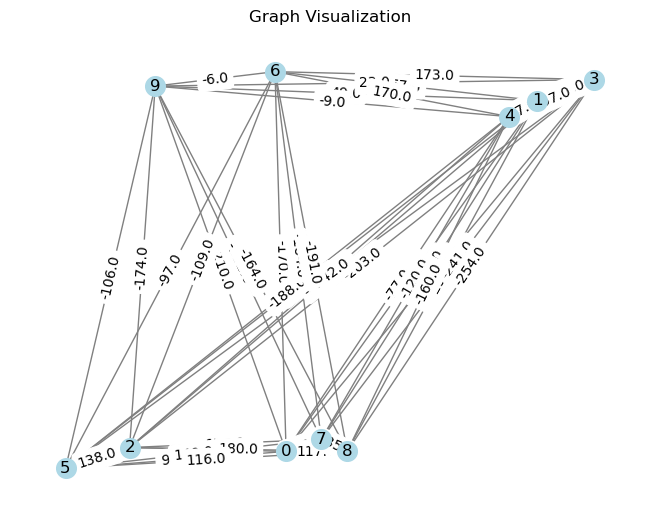

In [137]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.io

# Load the graph from the MATLAB file
mat_data = scipy.io.loadmat("/Users/jithinrajan/Desktop/NTU/Stranke94.mat")
adjacency_matrix = mat_data['Problem'][0][0][2]
G = nx.from_numpy_matrix(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Calculate the positions of nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, edge_color='gray')

# Set the labels of nodes
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Show the plot
plt.title("Graph Visualization")
plt.axis('off')
plt.show()


In [138]:
import numpy as np
from scipy.sparse import csr_matrix

# Access the sparse matrix from the loaded data
sparse_matrix = mat_data['Problem'][0][0][2]

sparse_matrix

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 90 stored elements in Compressed Sparse Column format>

In [139]:
numerical_values = sparse_matrix.astype(float)

# Convert the extracted numerical values to CSR format
csr_sparse_matrix = csr_matrix(numerical_values)

In [140]:
g = Graph(csr_sparse_matrix.shape[0])
g

In [141]:
edges = []
count = 0
for i in range(csr_sparse_matrix.shape[0]):
    for j in csr_sparse_matrix[i].nonzero()[1]:
        # Considering only upper triangular part to avoid duplicate edges
        if j > i:  
            weight = csr_sparse_matrix[i, j]
            edges.append((i, j, weight))
            count+=1
edges

[(0, 1, -215.0),
 (0, 2, 114.0),
 (0, 3, -89.0),
 (0, 4, -77.0),
 (0, 5, 94.0),
 (0, 6, -170.0),
 (0, 7, 176.0),
 (0, 8, 117.0),
 (0, 9, -210.0),
 (1, 2, -217.0),
 (1, 3, 134.0),
 (1, 4, 77.0),
 (1, 5, -150.0),
 (1, 6, 57.0),
 (1, 7, -253.0),
 (1, 8, -230.0),
 (1, 9, 49.0),
 (2, 3, -203.0),
 (2, 4, -80.0),
 (2, 5, 138.0),
 (2, 6, -109.0),
 (2, 7, 177.0),
 (2, 8, 180.0),
 (2, 9, -174.0),
 (3, 4, 157.0),
 (3, 5, -142.0),
 (3, 6, 173.0),
 (3, 7, -241.0),
 (3, 8, -254.0),
 (3, 9, 23.0),
 (4, 5, -188.0),
 (4, 6, 170.0),
 (4, 7, -120.0),
 (4, 8, -160.0),
 (4, 9, -9.0),
 (5, 6, -97.0),
 (5, 7, 140.0),
 (5, 8, 116.0),
 (5, 9, -106.0),
 (6, 7, -184.0),
 (6, 8, -191.0),
 (6, 9, -6.0),
 (7, 8, 235.0),
 (7, 9, -132.0),
 (8, 9, -164.0)]

In [142]:
mst = g.kruskal_mst(edges)
mst


[(3, 8, -254.0),
 (1, 7, -253.0),
 (3, 7, -241.0),
 (1, 2, -217.0),
 (0, 1, -215.0),
 (0, 9, -210.0),
 (6, 8, -191.0),
 (4, 5, -188.0),
 (4, 8, -160.0)]

In [143]:
# Minimum Spanning Tree edge weights 
for edge in mst:
    print(f"Edge: {edge[0]} -- {edge[1]}, Weight: {edge[2]}")

Edge: 3 -- 8, Weight: -254.0
Edge: 1 -- 7, Weight: -253.0
Edge: 3 -- 7, Weight: -241.0
Edge: 1 -- 2, Weight: -217.0
Edge: 0 -- 1, Weight: -215.0
Edge: 0 -- 9, Weight: -210.0
Edge: 6 -- 8, Weight: -191.0
Edge: 4 -- 5, Weight: -188.0
Edge: 4 -- 8, Weight: -160.0


In [144]:
# Edges in descending order of their weights 
sorted_edges = sorted(edges, key=lambda x: x[2])
for i in range(count):
    print(sorted_edges[i])

(3, 8, -254.0)
(1, 7, -253.0)
(3, 7, -241.0)
(1, 8, -230.0)
(1, 2, -217.0)
(0, 1, -215.0)
(0, 9, -210.0)
(2, 3, -203.0)
(6, 8, -191.0)
(4, 5, -188.0)
(6, 7, -184.0)
(2, 9, -174.0)
(0, 6, -170.0)
(8, 9, -164.0)
(4, 8, -160.0)
(1, 5, -150.0)
(3, 5, -142.0)
(7, 9, -132.0)
(4, 7, -120.0)
(2, 6, -109.0)
(5, 9, -106.0)
(5, 6, -97.0)
(0, 3, -89.0)
(2, 4, -80.0)
(0, 4, -77.0)
(4, 9, -9.0)
(6, 9, -6.0)
(3, 9, 23.0)
(1, 9, 49.0)
(1, 6, 57.0)
(1, 4, 77.0)
(0, 5, 94.0)
(0, 2, 114.0)
(5, 8, 116.0)
(0, 8, 117.0)
(1, 3, 134.0)
(2, 5, 138.0)
(5, 7, 140.0)
(3, 4, 157.0)
(4, 6, 170.0)
(3, 6, 173.0)
(0, 7, 176.0)
(2, 7, 177.0)
(2, 8, 180.0)
(7, 8, 235.0)
